Implementation of a Hopfield Network for memory recall. We apply the method to recovering text phrases that have been corrputed.

In [69]:
# Generate dictionary assigning each letter a number
import string
characters = {}
iteration = 1
for character in string.ascii_lowercase:
    characters[character] = iteration
    iteration += 1
characters[" "] = 0
numbers = dict((v,k) for k,v in characters.items())
print(characters)
print(numbers)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, ' ': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: ' '}


In [85]:
def text2binary(phrase):
    # Convert text string to a binary number
    bin_phrase = ""
    for char in phrase:
        num = characters[char]
        binary = format(num, "05b")
        bin_phrase += binary
    return bin_phrase

def binary2text(binary):
    # Convert a binary number into a text string
    txt = ""
    for num in range(len(binary)//5):
        letter = binary[num * 5: 5 * (num + 1)]
        letter = int(letter, 2)
        if letter > 25:
            letter = 0
        txt += numbers[letter]
    return txt

In [71]:
# I just read Dune so I will be taking quotes from that
# I'll Use 4 quotes that are split into two phrases
# I'll add spaces to get equal length of 50 
Phrase1 = "seek freedom and become captive of your desires   "
print(len(Phrase1))
Phrase2 = "seek discipline and find your liberty             "
print(len(Phrase2))
Phrase3 = "absolute power does not corrupt absolutely        "
print(len(Phrase3))
Phrase4 = "absolute power attracts the corruptible           "
print(len(Phrase4))
Phrase5 = "the mind commands the body and it obeys           "
print(len(Phrase5))
Phrase6 = "the mind orders itself and meets resistance       "
print(len(Phrase6))
Phrase7 = "i must not fear fear is the mind killer           "
print(len(Phrase7))
Phrase8 = "will face my fear i will permit it to pass over me"
print(len(Phrase8))

50
50
50
50
50
50
50
50


In [72]:
# Full quotes below
quote1 = Phrase1+Phrase2
print(quote1)
quote2 = Phrase3+Phrase4
print(quote2)
quote3 = Phrase5+Phrase6
print(quote3)
quote4 = Phrase7+Phrase8
print(quote4)

seek freedom and become captive of your desires   seek discipline and find your liberty             
absolute power does not corrupt absolutely        absolute power attracts the corruptible           
the mind commands the body and it obeys           the mind orders itself and meets resistance       
i must not fear fear is the mind killer           will face my fear i will permit it to pass over me


In [73]:
# Convert to 5 bit binary
quote1b = text2binary(quote1)
# print(quote1b)
quote2b = text2binary(quote2)
# print(quote2b)
quote3b = text2binary(quote3)
# print(quote3b)
quote4b = text2binary(quote4)
# print(quote4b)
# 500 binary digits, 4 patterns
import numpy as np
import matplotlib.pyplot as plt
N = 500
P = 4
Patterns = np.zeros((N, P))
iteration = 0
for char in quote1b:
    Patterns[iteration, 0] = float(char)
    iteration += 1
iteration = 0
for char in quote2b:
    Patterns[iteration, 1] = float(char)
    iteration += 1
iteration = 0
for char in quote3b:
    Patterns[iteration, 2] = float(char)
    iteration += 1
iteration = 0
for char in quote4b:
    Patterns[iteration, 3] = float(char)
    iteration += 1
Patterns[Patterns == 0] = -1

Text(0.5,1,'J Matrix')

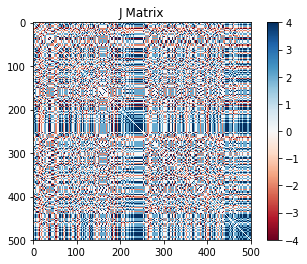

In [74]:
# Calculate the synaptic weight matrix of our quotes
J = Patterns @ Patterns.T
np.fill_diagonal(J, 0)
plt.imshow(J)
plt.set_cmap("RdBu")
plt.colorbar()
plt.title("J Matrix")

In [89]:
from random import randrange
import copy
pattern_to_recall = randrange(P)
S = copy.deepcopy(Patterns[:, pattern_to_recall])
# Scramble second phrase of quote
indices = np.random.uniform(0, 1, N//2)
for num in range(N//2):
    if indices[num] > 0.5:
        binary = np.random.uniform(0, 1)
        if binary > 0.5:
            S[num + 250] = 1
        else:
            S[num + 250] = -1
scrambled_quote = ""
for num in S:
    if num == -1:
        num = 0
    scrambled_quote += str(int(num))
scrambled_quote = binary2text(scrambled_quote)
print("Scrambled Quote: ")
print(scrambled_quote)

# Attempt to reconstruct full quote from corrupted quote by minimizing energy of the Hopfield Network
energy_old = np.infty
energy_new = -0.5 * S @ J @ S
steps = 100
iteration = 0
evolution_pattern = []
dynamics = np.zeros((N, steps))
overlaps = np.zeros((P, steps))
while iteration < steps and energy_old > energy_new:
    energy_old = energy_new
    evolution_pattern.append(S)
    dynamics[:, iteration] = S
    for num in range(P):
        overlaps[num, iteration] = np.dot(S.T, Patterns[:, num])
    vt = np.sign(J @ S)
    S = vt
    energy_new = -0.5 * S @ J @ S
    iteration += 1
reconstructed_quote = ""
for num in evolution_pattern[-1]:
    if num == -1:
        num = 0
    reconstructed_quote += str(int(num))
reconstructed_quote = binary2text(reconstructed_quote)
print("Reconstructed Quote: ")
print(reconstructed_quote)
# We get back the quote! WOOOOO


Scrambled Quote: 
seek freedom and become captive of your desires   vblkatiechphi  pavld ixd y twydy ucvaxdrrklqgpplq 
Reconstructed Quote: 
seek freedom and become captive of your desires   seek discipline and find your liberty             
